<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/regresion_lineal_miniproyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regreion lineal simple
## Comportamiento de impresiones (vistas) vs cliks en Facebook.
### Adrián Vazquez Mora 
### Estadistica Inferencial 
### ACT 501  

### Bibliotecas 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats 


In [44]:
import numpy as np
import os

# Graficar figuras 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Donde guardar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adrinvazquez","key":"11356a32c0fd63ebfc1dc34c8fea1898"}'}

In [3]:
!cp kaggle.json ~/.kaggle/


In [4]:
!kaggle datasets download -d START-UMD/gtd

 70% 20.0M/28.7M [00:00<00:00, 60.0MB/s]
100% 28.7M/28.7M [00:00<00:00, 73.0MB/s]


In [5]:
! unzip gtd.zip

Archive:  gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import h5py

ad_conversion = pd.read_csv('/content/ad_conversion.csv')
ad_conversion.head(1)

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1


### Regresión original simple 

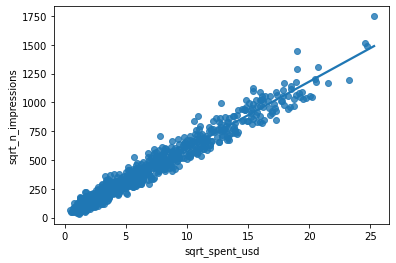

In [10]:
ad_conversion['sqrt_spent_usd'] = np.sqrt(ad_conversion['spent_usd'])
ad_conversion['sqrt_n_impressions'] = np.sqrt(ad_conversion['n_impressions'])


sns.regplot(x = 'sqrt_spent_usd', y= 'sqrt_n_impressions', data = ad_conversion, ci = None)
plt.show()


- Modelo y creacion de datos explicativos. 

In [36]:
from statsmodels.formula.api import ols

# Importamos el modelo de regresion de statsmodels
mdl_click_vs_impression_orig = ols('sqrt_n_impressions ~ sqrt_spent_usd', data = ad_conversion).fit()

# creacion de datos explicativos 
explanatory_data = pd.DataFrame({ 'sqrt_spent_usd': np.sqrt(np.arange(0,601,100)),
                                 'spent_usd' : np.arange(0,601,100)})

In [37]:
prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_click_vs_impression_orig.predict(explanatory_data),
                                          n_impressions = mdl_click_vs_impression_orig.predict(explanatory_data) ** 2)

print(prediction_data)

   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


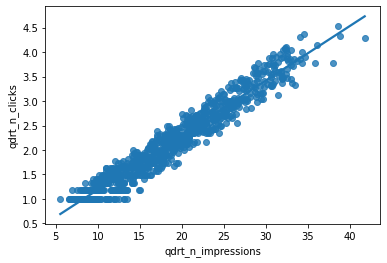

In [16]:
# nuevos qdrt_n_impressions and qdrt_n_clicks elevados a .25 
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# graficamos la trasnformacion de variables 
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
plt.show()

##  Regresion lineal con variables transformadas.

In [34]:
# regresion lineal con variables transformadas
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [35]:
# datos de busqueda
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Completamos las predicciones
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression_orig.predict(explanatory_data)
)

# resultados
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


## Transformación inversa 

- Para interpretar y visualizar correctamente sus predicciones, hay que hacer una transformación inversa.

In [20]:

prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


Saving figure regresion_act501


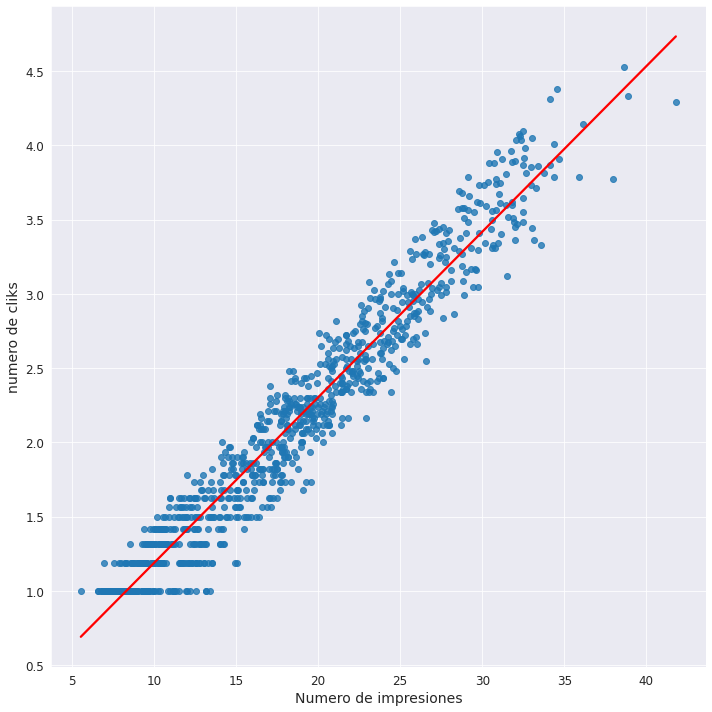

In [46]:

# graficando 

fig = plt.figure(figsize =(10,10))
sns.set_style("darkgrid")
plt.grid(True) # poner grid en la grafica
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None, line_kws={"color": "red"})

#sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="black")
plt.xlabel('Numero de impresiones')
plt.ylabel('numero de cliks')
save_fig("regresion_act501")
plt.show()

In [31]:
mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

- Aproximadamente si se aumenta en uno, el numero de impresiones, el aumento de likes es de 11.1533 % 

## Datos estadisticos de la regresión 

In [32]:
print(mdl_click_vs_impression.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:29:16   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

### Coeficiente de correlación lineal


In [33]:
print(mdl_click_vs_impression.rsquared)

0.9445272817143905


- Quiere decir que el número de impresiones explica el 94% de la variabilidad del número de clics.

## Error estandar 

- El error estándar residual (RSE) es una medida del tamaño típico de los residuos. De forma equivalente, es una medida de lo erróneas que pueden ser las predicciones. Los números más pequeños son mejores, siendo el cero un ajuste perfecto a los datos.

In [40]:
# Calcular el mse_orig para  mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calcular el  rse_orig para mdl_click_vs_impression
rse_orig = np.sqrt(mse_orig)
print("Error Est. del modelo original: ", rse_orig)

# Calcular  el mse_trans para  mdl_click_vs_impression_orig
mse_trans = mdl_click_vs_impression.mse_resid

# Calcular el rse_trans para  mdl_click_vs_impression
rse_trans = np.sqrt(mse_trans)
print("Error Est. del modelo transformado: ", rse_trans)

Error Est. del modelo original:  58.37823293979714
Error Est. del modelo transformado:  0.19690640896875722


- Tenemos un error aproximadamente del 2% 
- Una gran disminución del error entre la regresion original y la transformada. 

#### Ultimas aclaraciones. 

- La RSE es una métrica relacionada con la variable de respuesta.
L
- os residuos son la diferencia entre los valores observados y los valores predichos.

- El coeficiente de determinación se utiliza para explicar la variabilidad, no el RSE.

- Los coeficientes del modelo se utilizan para cuantificar la relación entre las variables explicativas y de respuesta, no el RSE

# FIN